## Restricted Boltzmann Machines


<a id="ref1"></a>

<h3>Initialization</h3>

First, we have to load the utility file which contains different utility functions that are not connected
in any way to the networks presented in the tutorials, but rather help in
processing the outputs into a more understandable way.


In [ ]:
import urllib.request
with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()

<h2>Installing TensorFlow </h2>

We will installing TensorFlow version 2.2.0 and its required prerequistes.  Also installing pillow...


In [ ]:
#!pip install grpcio==1.24.3
#!pip install tensorflow==2.2.0
#!pip install pillow

  Using cached tensorflow-2.2.0-cp37-cp37m-macosx_10_11_x86_64.whl (175.3 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
You should consider upgrading via 

<b>Notice:</b> This notebook has been created with TensorFlow version 2.2, and might not work with other versions. Therefore we check:


In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.2.0':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.2.0, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

Now, we load in all the packages that we use to create the net including the TensorFlow package:


In [ ]:
import tensorflow as tf
import numpy as np

from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline

<hr>


Each node in the first layer also has a <b>bias</b>. We will denote the bias as $v\_{bias}$, and this single value is shared among the $V$ visible units.

The <b>bias</b> of the second is defined similarly as $h\_{bias}$, and this single value among the $H$ hidden units.


In [ ]:
v_bias = tf.Variable(tf.zeros([7]), tf.float32)
h_bias = tf.Variable(tf.zeros([2]), tf.float32)

We have to define weights among the input layer and hidden layer nodes. In the weight matrix, the number of rows are equal to the input nodes, and the number of columns are equal to the output nodes. We define a tensor $\\mathbf{W}$ of shape = (7,2), where the number of visible neurons = 7, and the number of hidden neurons = 2. 


In [ ]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

<hr>


Before we go further, let's look at a toy example for one case out of all input. Assume that we have a trained RBM, and a very simple input vector, such as [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0].  
Let's see what the output of forward pass would look like:


In [ ]:
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], tf.float32)

v_state = X
print ("Input: ", v_state)

h_bias = tf.constant([0.1, 0.1])
print ("hb: ", h_bias)
print ("w: ", W)

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias)  #probabilities of the hidden units
print ("p(h|v): ", h_prob)

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) #states
print ("h0 states:", h_state)

Input:  tf.Tensor([[1. 0. 0. 1. 0. 0. 0.]], shape=(1, 7), dtype=float32)
hb:  tf.Tensor([0.1 0.1], shape=(2,), dtype=float32)
w:  tf.Tensor(
[[ 2.827173   -0.16366465]
 [-1.1411247   0.60453546]
 [ 0.15862437 -0.53415847]
 [ 0.22713101  1.8562595 ]
 [-1.5918248   0.655706  ]
 [-0.31843507 -0.7453791 ]
 [ 1.5611823   0.01081133]], shape=(7, 2), dtype=float32)
p(h|v):  tf.Tensor([[0.95907795 0.8572451 ]], shape=(1, 2), dtype=float32)
h0 states: tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


<b>Phase 2) Backward Pass (Reconstruction):</b>
The RBM reconstructs data by making several forward and backward passes between the visible and hidden layers.

So, in the second phase (i.e. reconstruction phase), the samples from the hidden layer (i.e. $\\mathbf h$) becomes the input in the backward pass. The same weight matrix and visible layer biases are used to passed to the sigmoid function. The reproduced output is a reconstruction which is an approximation of the original input.


In [ ]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print ("b: ", vb)
v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb)
print ("p(vi∣h): ", v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
print ("v probability states: ", v_state)

b:  tf.Tensor([0.1 0.2 0.1 0.1 0.1 0.2 0.1], shape=(7,), dtype=float32)
p(vi∣h):  tf.Tensor(
[[0.9406718  0.41663823 0.43154898 0.898748   0.30235285 0.29654306
  0.8418414 ]], shape=(1, 7), dtype=float32)
v probability states:  tf.Tensor([[1. 0. 0. 1. 0. 1. 1.]], shape=(1, 7), dtype=float32)


In [ ]:
inp = X
print("input X:" , inp.numpy())

print("probablity vector:" , v_prob[0].numpy())
v_probability = 1

for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)

print("probability of generating X: " , v_probability.numpy())

input X: [[1. 0. 0. 1. 0. 0. 0.]]
probablity vector: [0.9406718  0.41663823 0.43154898 0.898748   0.30235285 0.29654306
 0.8418414 ]
probability of generating X:  0.021760717


<hr>


<h2>MNIST</h2>


We will be using the MNIST dataset to practice the usage of RBMs. The following cell loads the MNIST dataset.


In [ ]:
#loading training and test data
mnist = tf.keras.datasets.mnist
(trX, trY), (teX, teY) = mnist.load_data()

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')
trX = flatten(trX/255.0)
trY = flatten(trY/255.0)

Lets look at the dimension of the images.


MNIST images have 784 pixels, so the visible layer must have 784 input nodes.  For our case, we'll use 50 nodes in the hidden layer, so i = 50.


In [ ]:
vb = tf.Variable(tf.zeros([784]), tf.float32)
hb = tf.Variable(tf.zeros([50]), tf.float32)

Let $\\mathbf W$ be the Tensor of 784x50 (784 - number of visible neurons, 50 - number of hidden neurons) that represents weights between the neurons. 


In [ ]:
W = tf.Variable(tf.zeros([784,50]), tf.float32)

Lets define the visible layer:


In [ ]:
v0_state = tf.Variable(tf.zeros([784]), tf.float32)

#testing to see if the matrix product works
tf.matmul( [v0_state], W)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)>

Now, we can define hidden layer:


In [ ]:
#computing the hidden nodes probability vector and checking shape
h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
print("h0_state shape: " , tf.shape(h0_prob))

#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state


h0_state = hidden_layer(v0_state, W, hb)
print("first 15 hidden states: ", h0_state[0][0:15])

h0_state shape:  tf.Tensor([ 1 50], shape=(2,), dtype=int32)
first 15 hidden states:  tf.Tensor([1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.], shape=(15,), dtype=float32)


Now, we define reconstruction part:


In [ ]:
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]

v1_state = reconstructed_output(h0_state, W, vb)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape:  ", v0_state.shape)
print("v1 state shape:  ", v1_state.shape)

hidden state shape:  (1, 50)
v0 state shape:   (784,)
v1 state shape:   (784,)


<h3>What is the objective function?</h3>

<b>Goal</b>: Maximize the likelihood of our data being drawn from that distribution

<b>Calculate error:</b>  
In each epoch, we compute the "error" as a sum of the squared difference between step 1 and step n,
e.g the error shows the difference between the data and its reconstruction.

<b>Note:</b> tf.reduce_mean computes the mean of elements across dimensions of a tensor.


In [ ]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error" , err.numpy())

error 0.5127551


$K$ is adjustable, and good performance can be achieved with $K=1$, so that we just take one set of sampling steps per image.


In [ ]:
h1_prob = tf.nn.sigmoid(tf.matmul([v1_state], W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random.uniform(tf.shape(h1_prob)))) #sample_h_given_X

Lets look at the error of the first run:


In [ ]:
print("error: ", error(v0_state, v1_state))

error:  tf.Tensor(0.5127551, shape=(), dtype=float32)


In [ ]:
#Parameters
alpha = 0.01
epochs = 1
batchsize = 200
weights = []
errors = []
batch_number = 0
K = 1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((trX, trY)).batch(batchsize)

for epoch in range(epochs):
    for batch_x, batch_y in train_ds:
        batch_number += 1
        for i_sample in range(batchsize):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == batchsize-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % epoch, 
                       "batch #: %i " % batch_number, "of %i" % 60e3/batchsize 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)



Let's take a look at the errors at the end of each batch:


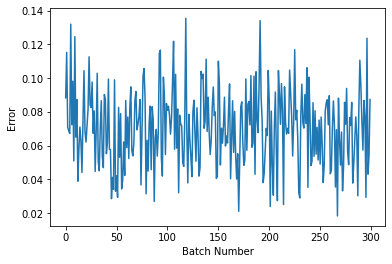

In [ ]:
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

What is the final weight matrix $W$ after training?


In [ ]:
print(W.numpy()) # a weight matrix of shape (50,784)

[[-0.41999987 -0.22000003 -0.23000003 ... -0.21000002 -0.32999995
  -0.4799998 ]
 [-0.3899999  -0.20000002 -0.22000003 ... -0.20000002 -0.25000003
  -0.5399998 ]
 [-0.3999999  -0.25000003 -0.22000003 ... -0.21000002 -0.31999996
  -0.5499998 ]
 ...
 [-0.3799999  -0.13999999 -0.23000003 ... -0.18       -0.35999992
  -0.55999976]
 [-0.42999986 -0.20000002 -0.25000003 ... -0.18       -0.32999995
  -0.6299997 ]
 [-0.4999998  -0.19000001 -0.21000002 ... -0.23000003 -0.31999996
  -0.57999974]]


<a id="ref5"></a>

<h3>Learned features</h3> 


We can take each hidden unit and visualize the connections between that hidden unit and each element in the input vector. In our case, we have 50 hidden units. Lets visualize those.


Let's plot the current weights:
<b>tile_raster_images</b> helps in generating an easy to grasp image from a set of samples or weights. It transforms the <b>uw</b> (with one flattened image per row of size 784), into an array (of size $28\\times28$) in which images are reshaped and laid out like tiles on a floor.


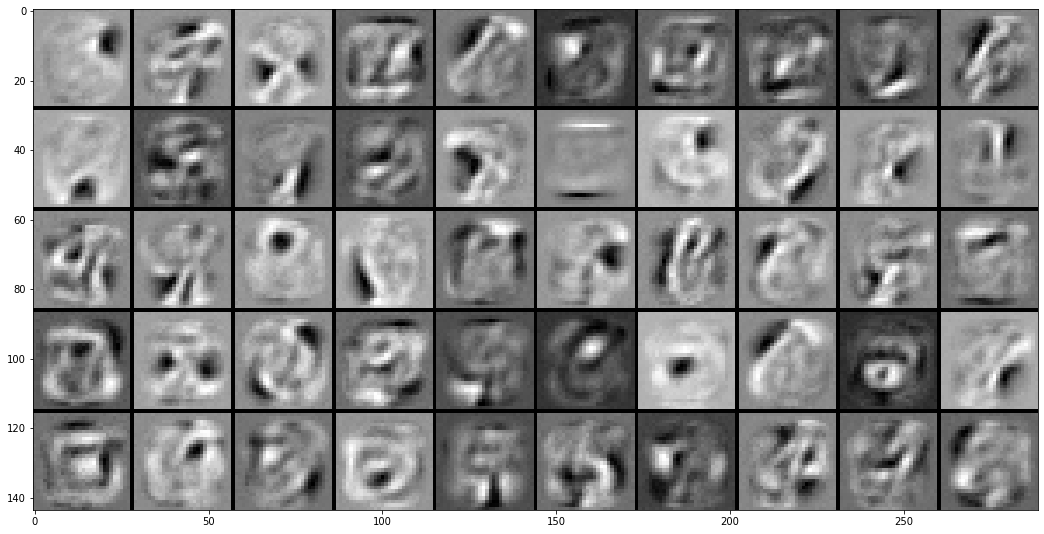

In [ ]:
tile_raster_images(X=W.numpy().T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=W.numpy().T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Each tile in the above visualization corresponds to a vector of connections between a hidden unit and visible layer's units. 


Let's look at one of the learned weights corresponding to one of hidden units for example. In this particular square, the gray color represents weight = 0, and the whiter it is, the more positive the weights are (closer to 1). Conversely, the darker pixels are, the more negative the weights. The positive pixels will increase the probability of activation in hidden units (after multiplying by input/visible pixels), and negative pixels will decrease the probability of a unit hidden to be 1 (activated). So, why is this important?  So we can see that this specific square (hidden unit) can detect a feature (e.g. a "/" shape) and if it exists in the input.


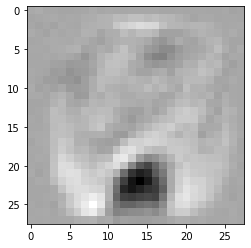

In [ ]:
from PIL import Image
image = Image.fromarray(tile_raster_images(X =W.numpy().T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Let's look at the reconstruction of an image now. Imagine that we have a destructed image of figure 3. Lets see if our trained network can fix it:

First we plot the image:


--2020-08-13 21:39:36--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2020-08-13 21:39:37--  https://ibm.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2020-08-13 21:39:37--  https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.27.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.27.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

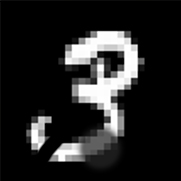

In [ ]:
!wget -O destructed3.jpg  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
img = Image.open('destructed3.jpg')
img

Now let's pass this image through the neural net:


In [ ]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0

sample_case = tf.cast(sample_case, dtype=tf.float32)

Feed the sample case into the network and reconstruct the output:


In [ ]:
hh0_p = tf.nn.sigmoid(tf.matmul(sample_case, W) + hb)
hh0_s = tf.round(hh0_p)

print("Probability nodes in hidden layer:" ,hh0_p)
print("activated nodes in hidden layer:" ,hh0_s)

# reconstruct
vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s, tf.transpose(W)) + vb)

print(vv1_p)
#rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer: tf.Tensor(
[[9.9746567e-10 6.7950826e-14 6.4821368e-01 1.0000000e+00 6.3082043e-06
  1.5193224e-04 1.0054410e-03 9.9917507e-01 3.6504853e-01 3.8511772e-08
  3.9718695e-10 9.9902654e-01 9.8582685e-01 2.1507412e-02 2.2831559e-03
  1.7464721e-08 5.8826165e-18 9.7752237e-01 6.3847113e-12 2.1039646e-16
  2.5280416e-03 8.1391028e-07 2.2130289e-13 2.9737855e-12 9.9999642e-01
  4.5396130e-12 7.6018715e-08 8.0302358e-04 1.6128761e-09 5.7224308e-05
  9.9402666e-01 7.5738072e-01 2.6156226e-11 9.9999785e-01 1.0000000e+00
  9.9475622e-01 1.5468615e-07 9.9998844e-01 9.9993151e-01 6.1828684e-09
  1.0000000e+00 2.6739992e-05 1.9896030e-04 9.9999940e-01 1.0000000e+00
  9.9596637e-01 1.3149075e-06 1.2916156e-11 9.9828947e-07 9.9895084e-01]], shape=(1, 50), dtype=float32)
activated nodes in hidden layer: tf.Tensor(
[[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
  0. 1.]]

Here we plot the reconstructed image:


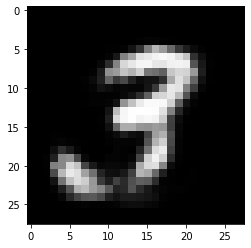

In [ ]:
img = Image.fromarray(tile_raster_images(X=vv1_p.numpy(), img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 